<a href="https://colab.research.google.com/github/shivdeshpande/Oasis/blob/main/oasis_unemployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("/content/Unemployment in India.csv")
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [12]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [13]:
df = df.rename(columns={df.columns[0]:'State',df.columns[3]:'EUR',df.columns[4]:'EE', df.columns[5]:'ELPR', df.columns[6]:'Region'})
df.head()

,State,Date,Frequency,EUR,EE,ELPR,Region
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [14]:
df["Region"].unique()

array(['Rural', nan, 'Urban'], dtype=object)

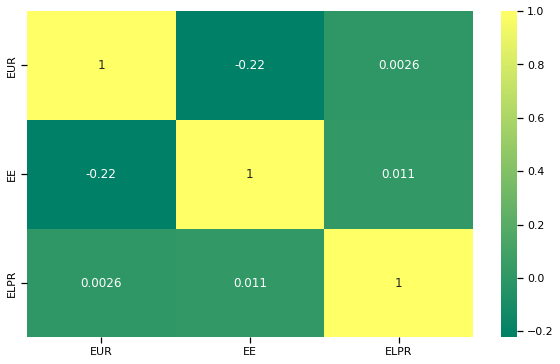

In [15]:
heat_maps = df[['EUR','EE', 'ELPR']]

heat_maps = heat_maps.corr()

plt.figure(figsize=(10,6))
sns.set_context('notebook',font_scale=1)
sns.heatmap(heat_maps, annot=True,cmap='summer');

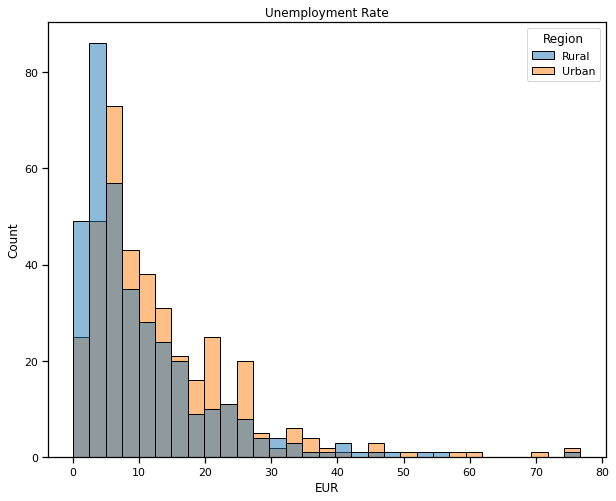

In [18]:
df.columns= ["State","Date","Frequency","EUR","EE","ELPR","Region"]

plt.figure(figsize=(10, 8))
plt.title("Unemployment Rate")
sns.histplot(x="EUR", hue="Region", data=df)
plt.show()

In [22]:
import plotly.express as px
region = df.groupby(["Region"])[['EUR', "EE", "ELPR"]].mean()
region = pd.DataFrame(region).reset_index()

fig = px.bar(region, x="Region", y="EUR", color="Region", title="Average Unemployment Rate by Region")
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()